In [12]:
import sys
from pathlib import Path

import os
import numpy as np
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

sys.path.append('..')
import helpers as h
import cv2 as cv

MASK_FOLDER = '../dataset_pericardium/label'
COMBINED_FOLDER = '../data/gt_combined'

In [10]:
mask_patients = h.listdir(MASK_FOLDER)
combined_image_patients = h.listdir(COMBINED_FOLDER)
mask_patients.sort()
combined_image_patients.sort()

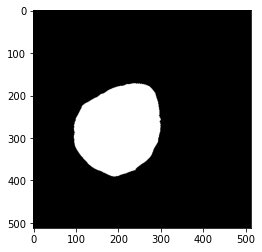

In [27]:
mask_images = h.listdir(os.path.join(MASK_FOLDER, mask_patients[0]))
mask_images.sort()
mask_img = cv.imread(os.path.join(MASK_FOLDER, mask_patients[0], mask_images[0]))
plt.imshow(mask_img)

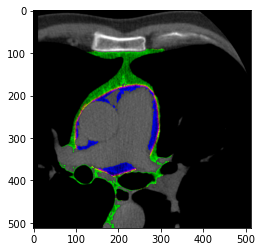

In [28]:
combined_images = h.listdir(os.path.join(COMBINED_FOLDER, combined_image_patients[0]))
combined_images.sort()
combined_img = cv.imread(os.path.join(COMBINED_FOLDER, combined_image_patients[0], combined_images[0]))
plt.imshow(combined_img)

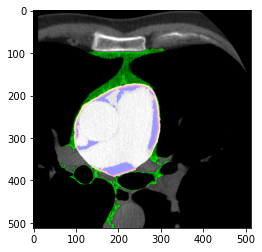

In [32]:
superimposed = cv.addWeighted(combined_img, 1, mask_img, 0.6, 0)
plt.imshow(superimposed)

In [41]:
for i in range(len(combined_image_patients)):
    h.mkdir(os.path.join('../data/label_help', combined_image_patients[i]))

    mask_images = h.listdir(os.path.join(MASK_FOLDER, mask_patients[i]))
    mask_images.sort()
    
    combined_images = h.listdir(os.path.join(COMBINED_FOLDER, combined_image_patients[i]))
    combined_images.sort()

    for j in range(len(combined_images)):
        combined_img = cv.imread(os.path.join(COMBINED_FOLDER, combined_image_patients[i], combined_images[j]))
        
        if j >= len(mask_images):
            print("missing:", combined_image_patients[i], combined_images[j])
            cv.imwrite(os.path.join('../data/label_help', combined_image_patients[i], combined_images[j]), combined_img)
            continue
        
        mask_img = cv.imread(os.path.join(MASK_FOLDER, mask_patients[i], mask_images[j]))
        superimposed = cv.addWeighted(combined_img, 1, mask_img, 0.6, 0)
        file_name = mask_images[j]
        cv.imwrite(os.path.join('../data/label_help', combined_image_patients[i], mask_images[j]), superimposed)

missing: AEdu IM-0006-0037.bmp
missing: AEdu IM-0006-0038.bmp
missing: AEdu IM-0006-0039.bmp
missing: AEdu IM-0006-0040.bmp
missing: FPiq IM-0002-0043.bmp
missing: VMar IMG-0004-00045.bmp
